# **Q1. Define Problem Statement and perform Exploratory Data Analysis**

**i) Definition of problem**
# **Problem Statement:**

---
Yulu, a micro-mobility company in India, is facing a drop in revenue. To improve its business, the company wants to find out what factors affect the demand for its shared electric cycles.

They have shared data that includes information like weather, temperature, season, holidays, and user types. The goal is to:

*  Identify which factors impact the number of rides.

*  Understand how these factors affect demand.

*  Use these insights to plan better services, pricing, and marketing.

Additionally, we will extract time-based features (like hour, day, and weekday) from the datetime field to analyze daily and weekly usage trends, which can further support smart scheduling and resource allocation.

By leveraging this data-driven approach, Yulu can optimize its service model, reduce idle resources, and improve user satisfaction, ultimately working toward reversing the revenue decline.

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O yulu_data.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/yulu_data.csv
100% 648k/648k [00:00<00:00, 9.95MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('yulu_data.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


**ii) Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.**

In [ ]:
df.shape

(10886, 12)

**Observation:**

The dataset has **10,886 records (rows)** and **12 features (columns)**. Each record shows details about electric cycle usage, like date, weather, temperature, and number of users.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Observation:**

The dataset has 10,886 entries and 12 columns.

There are no missing values in any column.

Column data types:

*  1 object column: datetime (will be converted to datetime format).

*  8 integer columns: including season, holiday, workingday, etc.

*  3 float columns: temp, atemp, and windspeed.

**Identification and conversion of categorical attributes to 'category'**

In [ ]:
for i in df.columns:
  print(i, ':', df[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


**Obeservations:**

Columns like season, holiday, workingday, and weather have limited unique values, best treated as categorical variables.

The rest are continuous numerical variables that will help us understand patterns and correlations in electric cycle demand.

Since season, holiday, workingday, and weather columns have limited and fixed categories, we are converting their data types to categorical for better analysis and memory efficiency.

**Business implications of convresaion of categorical columns -**

The business problem is to understand what factors affect the demand for shared electric cycles. By converting key columns to categorical, we get the following benefits:
*  Better Grouping & Analysis
*  More Accurate Visualizations
*  Marketing campaigns
*  Resource planning

In [ ]:
num_categorical_df = df.copy()
num_categorical_df['season'] = num_categorical_df['season'].astype('category')
num_categorical_df['holiday'] = num_categorical_df['holiday'].astype('category')
num_categorical_df['workingday'] = num_categorical_df['workingday'].astype('category')
num_categorical_df['weather'] = num_categorical_df['weather'].astype('category')
num_categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


In [ ]:
num_categorical_df['datetime'] = pd.to_datetime(num_categorical_df['datetime'])

num_categorical_df['hour'] = num_categorical_df['datetime'].dt.hour
num_categorical_df['day'] = num_categorical_df['datetime'].dt.day
num_categorical_df['month'] = num_categorical_df['datetime'].dt.month
# num_categorical_df['weekday'] = num_categorical_df['datetime'].dt.weekday
num_categorical_df['weekday'] = num_categorical_df['datetime'].dt.day_name()
num_categorical_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,1,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,1,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,1,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,19,12,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,19,12,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,19,12,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,19,12,Wednesday


**Null value detection**

In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


**Obersvations:**

There are no missing (null) values in any of the columns. The dataset is clean and complete, which makes it ready for analysis.

**statistical summary for numerical columns**

In [ ]:
num_categorical_df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,9.992559,6.521495
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,5.000000,4.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,10.000000,7.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,15.000000,10.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,19.000000,12.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,5.476608,3.444373


**Observations:**

* The dataset has 10,886 records for all these numerical features.

* The average temperature is about 20°C, with values ranging from 0.8°C to 41°C.

* The average “feels like” temperature (atemp) is slightly higher at around 23.6°C.

* The humidity varies widely, from 0% to 100%, with an average of about 62%.

* The average wind speed is about 12.8 units, but it can be as high as 57.

* For users:

  * On average, there are about 36 casual users and 156 registered users per record.

  * The total number of users (count) averages to about 192 per record.

* User counts show a large range, with some times having no users and some having up to 977 total users.
* The average hour is about 11.5, the average day is around 10, and the average month is around 6.5
* The values range from 0 to 23 for hour, 1 to 19 for day and 1 to 12 for month.
* Most of the hour values lie between 6 to 18, day values between 5 and 15, and month values between 4 to 10.

**statistical summary for categorical column**

In [ ]:
num_categorical_df.describe(include=['category', 'object'])

,season,holiday,workingday,weather,weekday
count,10886,10886,10886,10886,10886
unique,4,2,2,4,7
top,4,0,1,1,Saturday
freq,2734,10575,7412,7192,1584


**Observations:**

* Datetime has 10,886 unique values, meaning each record has a unique timestamp — no duplicates. This confirms that each entry logs a specific hour of cycle usage.

* Season has 4 unique categories, with season 4 (likely winter) appearing most frequently (2,734 times). This helps analyze seasonal trends in demand.

* Holiday has only 2 categories — 0 (non-holiday) appears 10,575 times, meaning most of the data is from regular days. This can help compare usage patterns between holidays and regular days.

* Workingday also has 2 categories, where 1 (working day) occurs 7,412 times, indicating most data represents working days — useful for understanding commuter behavior.
* Weekday has 7 unique values, where saturday appearing most frequently (1584 times).

* Weather has 4 unique conditions, with weather type 1 (likely clear or partly cloudy) being most common (7,192 times). This shows that most rides happen during good weather conditions.

**Non Visual Analysis**

In [ ]:
num_categorical_df.groupby('season', observed=False)['count'].mean()

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


**Observations:**

* Highest Demand: Season 3 (Fall) has the highest average ride count (234), indicating strong user engagement during this period.

* Low Demand in Spring: Season 1 (Spring) shows the lowest average rides (116), which may point to less favorable riding conditions or lower user interest during this time.

* Summer and Winter are Moderate: Season 2 (Summer) and Season 4 (Winter) show moderate usage, with 215 and 199 rides respectively.

**Business Implications:**

* Yulu should prioritize resource allocation and fleet readiness during Fall and Summer, as demand peaks in these seasons.

* The low ride count in Spring suggests a need to investigate causes possibly weather discomfort, poor marketing, or reduced operational coverage and take corrective actions such as promotions or improved service availability.
* Align marketing campaigns with seasonal trends, focusing on capitalizing high-demand seasons and boosting awareness in low-demand ones.

In [ ]:
num_categorical_df.groupby('weather', observed=False)['count'].mean()

,count
weather,
1,205.236791
2,178.955540
3,118.846333
4,164.000000


**Observations:**

* Highest Demand in Clear Weather (Code 1): Ride counts are highest during clear and partly cloudy weather, which is expected due to better visibility and comfortable conditions.

* Decline in Rides with Poor Weather (Code 3): The lowest ride counts are observed during light snow or rain with thunderstorm, which likely discourages users.

* Weather Code 4 (Severe conditions) still has more usage than Code 3: This might suggest operational resilience or unavoidable travel needs even in extreme conditions like heavy rain or snow.

* Moderate Usage in Misty Conditions (Code 2): Mist and cloudy weather sees a decent number of rides but still significantly less than clear weather.

**Business Implications:**

* Yulu can predict lower demand on rainy or snowy days and reduce bikes on roads to save costs.

* On clear weather days, Yulu should make more bikes available to meet high demand.

* Offer discounts or promotions on misty or cloudy days to encourage more rides.

* Share safety tips and ensure bikes are in good condition during bad weather to build user trust.

In [ ]:
num_categorical_df.groupby('workingday', observed=False)['count'].mean()

,count
workingday,
0,188.506621
1,193.011873


**Observations:**

* People take slightly more rides on working days (193 rides).

* The difference between working and non-working days is not very large (5 rides).

**Business Implications:**

* Yulu bikes are used almost equally on both working and non-working days, so bikes should be available every day.

* On working days, ensure bikes are ready during office hours (morning and evening commute).

* On weekends or holidays, plan for leisure or recreational routes where people might ride for fun.

In [ ]:
num_categorical_df.groupby('holiday', observed=False)['count'].mean()

,count
holiday,
0,191.741655
1,185.877814


**Observations:**

* Slightly fewer rides happen on holidays compared to regular days.

* The difference is not very big (~6 rides less on holidays).

**Business Implications:**

* Yulu should keep bikes available on both holidays and regular days, as demand is fairly steady.

* On holidays, people may ride later in the day or for leisure — so bike availability should focus on parks, tourist spots, or shopping areas.

* On non-holidays, ensure bikes are ready for office commutes, especially during morning and evening peak hours.

**iii) Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)**

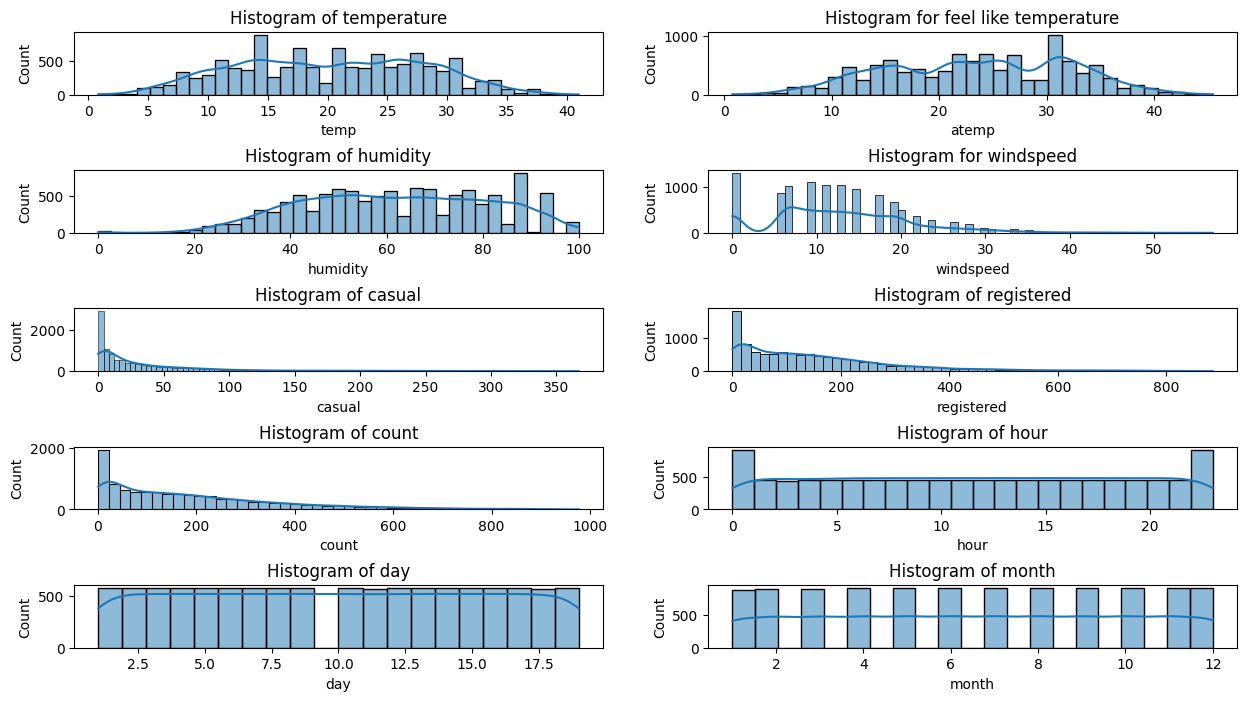

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(5, 2, 1)
plt.title("Histogram of temperature")
sns.histplot(x=num_categorical_df['temp'], data=num_categorical_df, kde=True)

plt.subplot(5, 2, 2)
plt.title("Histogram for feel like temperature")
sns.histplot(x=num_categorical_df['atemp'],data=num_categorical_df, kde=True)


plt.subplot(5, 2, 3)
plt.title("Histogram of humidity")
sns.histplot(x=num_categorical_df['humidity'], data=num_categorical_df, kde=True)


plt.subplot(5, 2, 4)
plt.title("Histogram for windspeed")
sns.histplot(x=num_categorical_df['windspeed'],data=num_categorical_df, kde=True)


plt.subplot(5, 2, 5)
plt.title("Histogram of casual")
sns.histplot(x=num_categorical_df['casual'], data=num_categorical_df, kde=True)

plt.subplot(5, 2, 6)
plt.title("Histogram of registered")
sns.histplot(x=num_categorical_df['registered'], data=num_categorical_df, kde=True)

plt.subplot(5, 2, 7)
plt.title("Histogram of count")
sns.histplot(x=num_categorical_df['count'], data=num_categorical_df, kde=True)

plt.subplot(5, 2, 8)
plt.title("Histogram of hour")
sns.histplot(x=num_categorical_df['hour'], data=num_categorical_df, kde=True)

plt.subplot(5, 2, 9)
plt.title("Histogram of day")
sns.histplot(x=num_categorical_df['day'], data=num_categorical_df, kde=True)

plt.subplot(5, 2, 10)
plt.title("Histogram of month")
sns.histplot(x=num_categorical_df['month'], data=num_categorical_df, kde=True)

plt.subplots_adjust(hspace=1.2)
plt.show()

**Observations:**

1. Temperature (temp) & Feel-like Temperature (atemp):

    Distribution Type: Nearly Normal (Bell-shaped).

    Observation: Most temperatures are between 10°C and 30°C, peaking around 20–25°C.

    This indicates that rides are commonly taken in moderate weather, which may help in planning optimal operating conditions.

2. Humidity:

    Distribution Type: Slightly Right-Skewed (positive skew).

    Observation: Majority of humidity values lie between 40% and 80%, with few extreme values.

    High humidity might affect rider comfort, so it may influence demand slightly.

3. Windspeed:

    Distribution Type: Right-Skewed.

    Observation: Most values are below 20, with a long tail stretching to higher values.

    Very low windspeed days are most common — extremely windy conditions are rare (and may reduce usage).

4. Casual Users (casual):

    Distribution Type: Highly Right-Skewed.

    Observation: Most casual usage values are low (under 50), indicating many short/occasional trips.

    Shows that casual users generally use the bikes less often and in smaller numbers.

5. Registered Users (registered):

    Distribution Type: Right-Skewed, but more spread out than casual.

    Observation: More frequent usage compared to casuals, often over 200+ rides in a time slot.

    Suggests consistent usage by registered users, key to business revenue.

6. Total Count (count):

    Distribution Type: Right-Skewed.

    Observation: Most ride counts are under 300, with a few extreme peaks.

    Shows high variability in demand depending on time and conditions.

7.  Hour:

    Distribution Type: Bimodal.

    Observation: Peaks arount 8 AM and 5-6 PM.

    Suggests usage during morning and evening hours.

8.  Day:

    Distribution Type: Uniform

    Observations: The values are evenly spread across all days.

    Each day has a similar number of entries.

9.  Month:

    Distribution Type: Uniform.

    Observations: Data is distributed evenly across all months.

    No seasonal data gaps.



**Business Implications:**

Right-skewed usage (especially for casual, registered, count) implies few high-demand periods, which are crucial for targeted marketing and resource allocation.

Normal distribution in temp/atemp shows users prefer moderate weather, so seasonal campaigns could be effective.

High usage around 8 - 9 PM and 5-6 PM suggests users are commuting to and from work or school. More bikes should be made available during these time to avoid shortage.

There is stable usage throughout day / month indicates that the service is not heavily seasonal.

Understanding these patterns can help optimize vehicle distribution, pricing, and staffing.

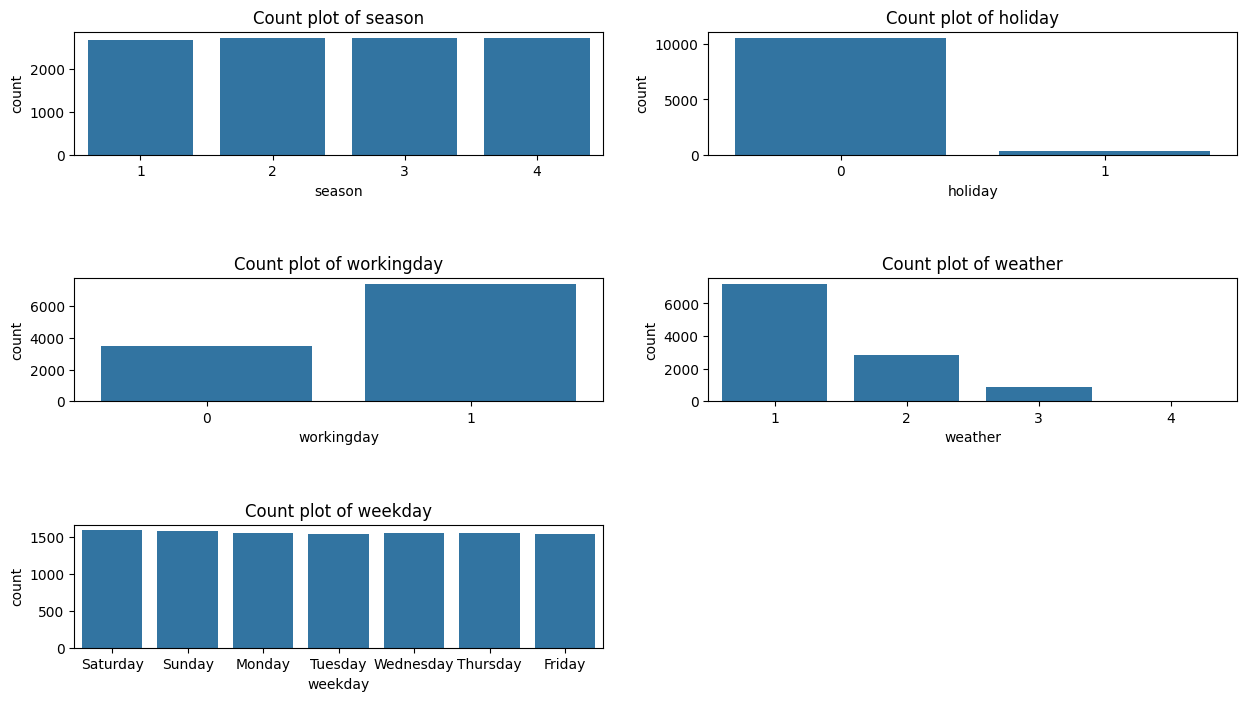

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(3, 2, 1)
plt.title("Count plot of season")
sns.countplot(x=num_categorical_df['season'], data=num_categorical_df)

plt.subplot(3, 2, 2)
plt.title("Count plot of holiday")
sns.countplot(x=num_categorical_df['holiday'], data=num_categorical_df)

plt.subplot(3, 2, 3)
plt.title("Count plot of workingday")
sns.countplot(x=num_categorical_df['workingday'], data=num_categorical_df)

plt.subplot(3, 2, 4)
plt.title("Count plot of weather")
sns.countplot(x=df['weather'], data=num_categorical_df)

plt.subplot(3, 2, 5)
plt.title("Count plot of weekday")
sns.countplot(x=num_categorical_df['weekday'], data=num_categorical_df)

plt.subplots_adjust(hspace=1.0)
plt.show()

**Observations and business implications:**
1. Season

**Observation:** The ride counts are almost evenly distributed across all four seasons.

**Business Implication:** There’s no strong seasonal drop in demand, so bike availability and operations can remain relatively stable throughout the year.

2. Holiday

**Observation:** Most data points are for non-holidays (value 0); holidays are very few.

**Business Implication:** Since holidays are rare in the data, business planning should focus more on regular days. Special promotions on holidays may not impact overall performance much.

**Note:**

 The holiday column refers to official public holidays only (e.g., national holidays like Independence Day).

These are relatively rare in a year (around 10–12 days).

That's why the count is low for holidays.

3. Working Day

**Observation:** Higher count on working days compared to non-working days.

**Business Implication:** Bike demand is higher on working days, indicating commuters use the service more for daily work travel. Ensure good availability on weekdays, especially during rush hours.

4. Weather

**Observation:** Most days have weather type 1 (Clear to partly cloudy). Count drops significantly in worse weather conditions (2, 3, 4).

**Business Implication:** Poor weather significantly affects demand. On rainy or snowy days, expect fewer rides. Plan maintenance and resource allocation accordingly.

5. Weekday

**Observation:** The number of rides is fairly consistent across all days of the week.

**Business Implication:** No specific weekday stands out. Daily operations and staff allocation can be kept uniform across the week.

**Note:**

A Saturday or Sunday is not marked as a holiday in the holiday column unless it is a special public holiday.

So, weekends are typically counted as workingday = 0, but not as holiday = 1.



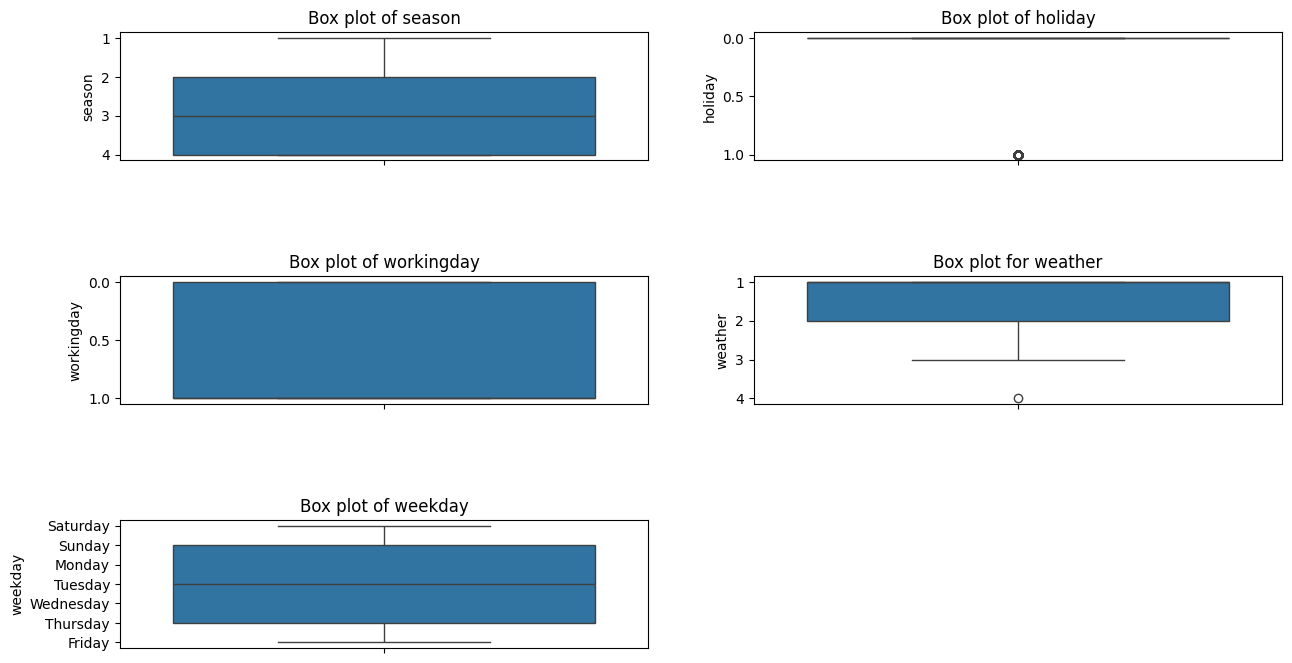

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(3, 2, 1)
plt.title("Box plot of season")
sns.boxplot(y = num_categorical_df['season'], data = num_categorical_df)

plt.subplot(3, 2, 2)
plt.title("Box plot of holiday")
sns.boxplot(y = num_categorical_df['holiday'], data = num_categorical_df)


plt.subplot(3, 2, 3)
plt.title("Box plot of workingday")
sns.boxplot(y = num_categorical_df['workingday'], data = num_categorical_df)


plt.subplot(3, 2, 4)
plt.title("Box plot for weather")
sns.boxplot(y = num_categorical_df['weather'], data = num_categorical_df)


plt.subplot(3, 2, 5)
plt.title("Box plot of weekday")
sns.boxplot(y = num_categorical_df['weekday'], data = num_categorical_df)

plt.subplots_adjust(hspace=0.9)
plt.show()

* Season: Values range from 1 to 4 (representing seasons: Spring, Summer, Fall, Winter). The data seems evenly distributed across all four seasons.

    No outliers.

    **Business Insight:** Demand is spread evenly across seasons. Business should ensure service availability year-round.

* Holiday: Two values – 0 (not a holiday), 1 (holiday). There are some outliers for value = 1 because holidays are rare.

    These appear as points beyond the lower whisker.

    **Business Insight:** Holidays are uncommon but might influence rider behavior (e.g., leisure rides). Plan special offers.

* Workingday: Binary variable (0 or 1). No outliers seen.

    Values are split well.

    **Business Insight:** High usage on working days shows bike rental is a preferred mode for commuting.

* Weather: Mostly values = 1 and 2 (Clear, partly cloudy or Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, weather).

    One clear outlier at 4 (extreme weather: heavy rain, snow, fog). Very few such cases.

    **Business Insight:** Bad weather significantly reduces bike rentals. This is a known pattern services can be reduced or paused on extreme weather days.

* Weekday: Values range from 0 (Sunday) to 6 (Saturday).

    No visible outliers, and values are evenly distributed.

    **Business Insight:** Consistent usage through the week. Strong weekday and weekend demand.

In [ ]:
num_categorical_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,Saturday


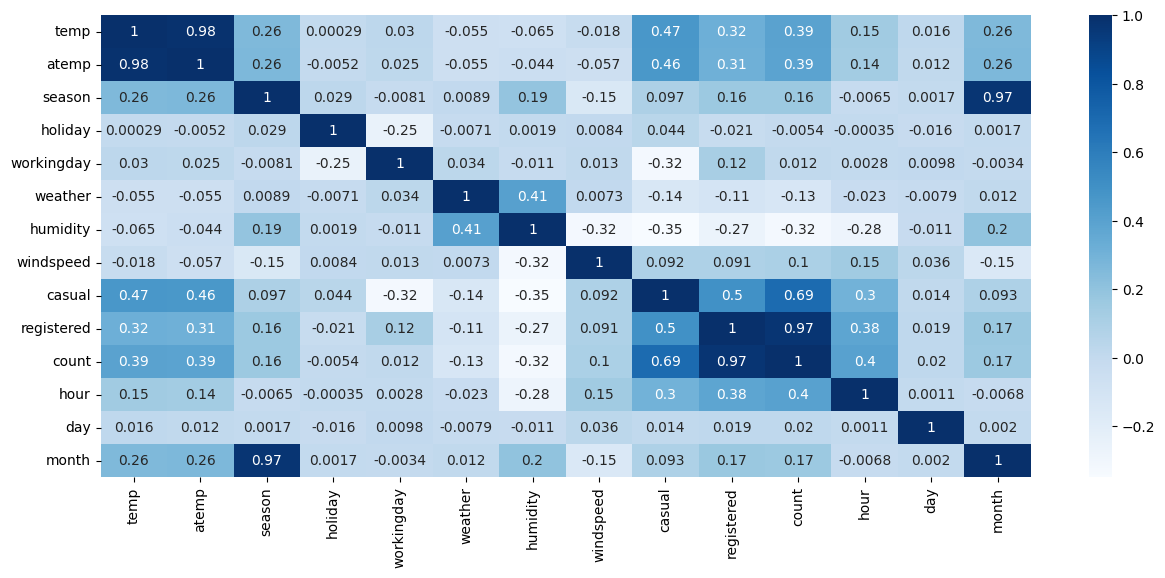

In [ ]:
selectedcols_df = num_categorical_df[['temp', 'atemp','season', 'holiday', 'workingday','weather','humidity','windspeed','casual', 'registered', 'count','hour', 'day','month']]
plt.figure(figsize=(15,6))
sns.heatmap(selectedcols_df.corr(), cmap="Blues", annot=True)
plt.show()

**Observations**:

* There is a strong positive correlation between registered users and count (0.97), and between casual users and count (0.69), which makes sense since the total count is the sum of these two.

* temp and atemp are very strongly correlated (0.98), as they represent actual and perceived temperature.

* count shows a moderate positive correlation with temp (0.39) and hour (0.40), suggesting that higher temperatures and certain hours of the day are linked with more cycle rentals.

* humidity shows a moderate negative correlation with count (−0.32), indicating that as humidity increases, the number of rides tends to decrease.

* casual rides also decrease moderately with rising humidity (−0.35), suggesting weather discomfort impacts casual users more.

* Variables like holiday, workingday, and weather show very weak or no correlation with ride count, meaning they don’t strongly influence demand.

* Calendar variables like season, month, and day also show low correlation with count, suggesting that other features like temperature or user type play a bigger role.

**Business Implications:**

* Since registered users strongly impact the total ride count, retaining and targeting registered users can have the biggest impact on revenue.

* Warmer temperatures lead to more rides, so Yulu should increase bike availability during warm months and prepare for higher usage.

* High humidity discourages riding, so during humid days, Yulu can offer discounts or promotions to attract more users.

* Rides are moderately influenced by the hour of the day, so Yulu should ensure more bikes are available during peak commute times (like morning and evening).

* Because holiday and workingday have little impact, bike availability can remain stable across weekdays and holidays.

* Since casual rides are more affected by weather, special weather-based marketing or reminders can help increase usage among this group.

**Detection of outlier:**

In [ ]:
import pandas as pd
import numpy as np

numerical_cols_for_outliers = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour', 'day', 'month']

for col in numerical_cols_for_outliers:
    Q1 = num_categorical_df[col].quantile(0.25)
    Q3 = num_categorical_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = num_categorical_df[(num_categorical_df[col] < lower_bound) | (num_categorical_df[col] > upper_bound)]
    print(f"Outlier count in '{col}': {len(outliers)}")


Outlier count in 'temp': 0
Outlier count in 'atemp': 0
Outlier count in 'humidity': 22
Outlier count in 'windspeed': 227
Outlier count in 'casual': 749
Outlier count in 'registered': 423
Outlier count in 'count': 300
Outlier count in 'hour': 0
Outlier count in 'day': 0
Outlier count in 'month': 0


**Observations:**

* No outliers found in: 'temp', 'atemp', 'hour', 'day', 'month'.

* Outliers are present in:

    'humidity': 22

    'windspeed': 227

    'casual': 749

    'registered': 423

    'count': 300

**Outlier Treatment Using Clipping**

In [ ]:
import numpy as np

num_categorical_df['humidity'] = num_categorical_df['humidity'].clip(lower=num_categorical_df['humidity'].quantile(0.01),
                                     upper=num_categorical_df['humidity'].quantile(0.99))
num_categorical_df['windspeed'] = num_categorical_df['windspeed'].clip(lower=num_categorical_df['windspeed'].quantile(0.01),
                                       upper=num_categorical_df['windspeed'].quantile(0.99))


num_categorical_df['casual_log'] = np.log1p(num_categorical_df['casual'])
num_categorical_df['registered_log'] = np.log1p(num_categorical_df['registered'])
num_categorical_df['count_log'] = np.log1p(num_categorical_df['count'])


* I applied outlier capping using the 1st and 99th percentiles on humidity and windspeed column.
* I am removing extreme values by clipping them to fall within the 1%–99% range. This helps reduce skewness and prevents model distortion due to outliers.
* I applied log transformation using np.log1p() to these columns: 'casual', 'registered', 'count'. This is a common technique to handle right-skewed distributions, especially when dealing with count data.
* humidity and windspeed are continuous environmental measurements. Outliers here may be due to sensor errors or rare events (like sudden storms).Such outliers are not meaningful for user behavior, so clipping makes sense.
*  Other Columns Like casual, registered, count are Right-Skewed by Nature.
These are count variables, and naturally, a few time slots will have very high rental numbers.
* These "outliers" are not necessarily errors, they can hold important information. Instead of clipping them, you smartly applied log transformation to handle their skewness without losing important patterns.


**iv) Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.**

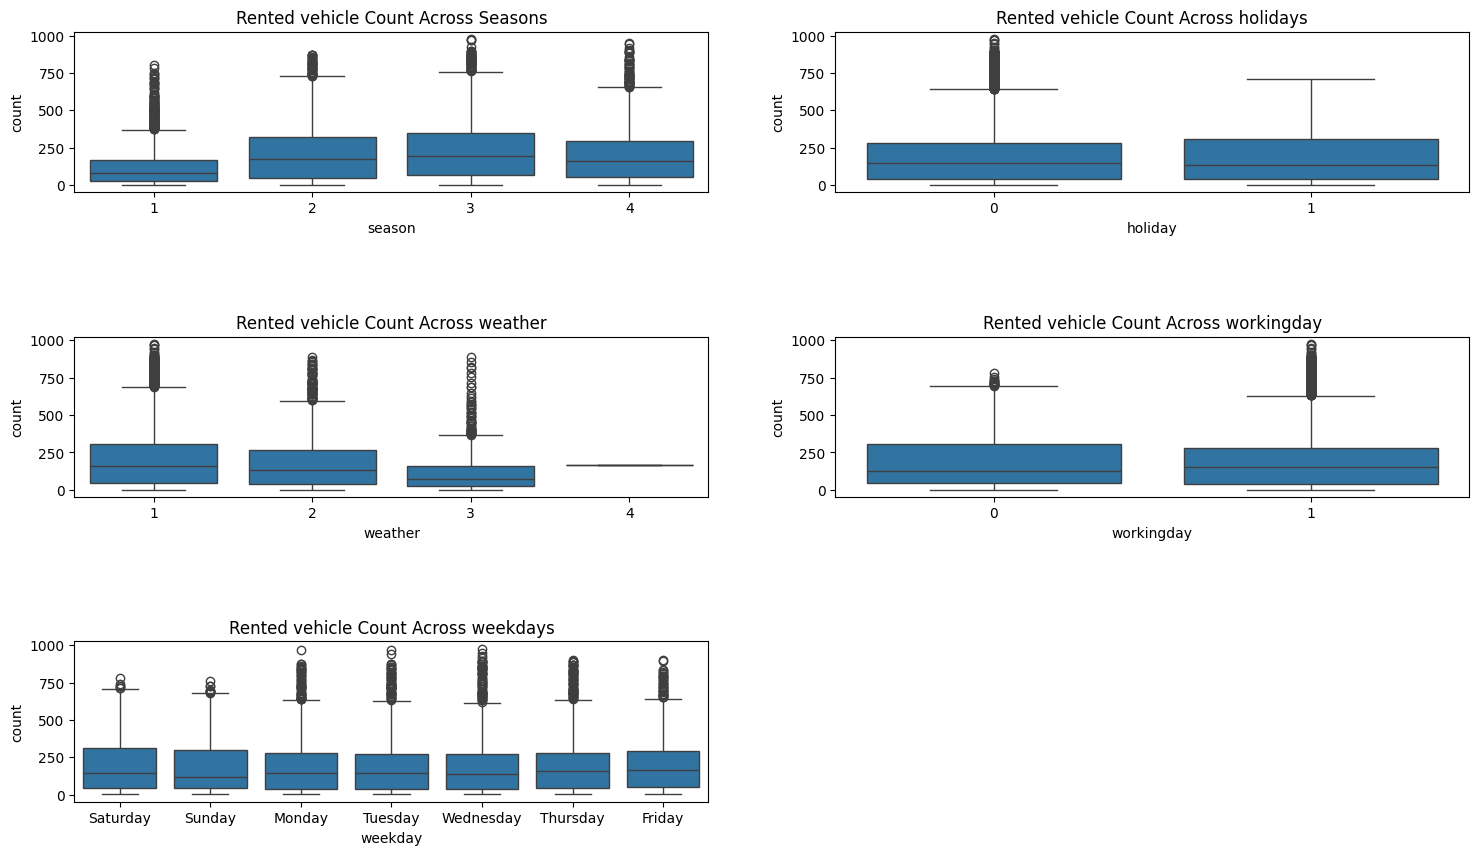

In [ ]:
plt.figure(figsize=(18,10))

plt.subplot(3, 2, 1)
plt.title("Rented vehicle Count Across Seasons")
sns.boxplot(x = num_categorical_df['season'], y = num_categorical_df['count'], data = num_categorical_df)

plt.subplot(3, 2, 2)
plt.title("Rented vehicle Count Across holidays")
sns.boxplot(x = num_categorical_df['holiday'], y = num_categorical_df['count'], data = num_categorical_df)


plt.subplot(3, 2, 3)
plt.title("Rented vehicle Count Across weather")
sns.boxplot(x = num_categorical_df['weather'], y = num_categorical_df['count'], data = num_categorical_df)


plt.subplot(3, 2, 4)
plt.title("Rented vehicle Count Across workingday")
sns.boxplot(x = num_categorical_df['workingday'], y = num_categorical_df['count'], data = num_categorical_df)


plt.subplot(3, 2, 5)
plt.title("Rented vehicle Count Across weekdays")
sns.boxplot(x = num_categorical_df['weekday'], y = num_categorical_df['count'], data = num_categorical_df)



plt.subplots_adjust(hspace=0.9)
plt.show()

1. Season
Category:
1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter

**Observation:**

Highest rental counts are seen during Fall (3) and Summer (2).

Spring (1) may have lower average rentals per day.

We expected winter (cold weather) to lower rentals, but the plot shows rental counts similar to fall and summer. No sharp drop distribution and median are relatively stable.

**Business Insight:**

Operational Planning: Focus on fleet expansion, maintenance, and marketing during summer and fall to meet demand.

Promotions: Offer discounts or loyalty bonuses in winter to attract riders.

Event Campaigns: Run season-based campaigns to increase visibility.

2. Holiday
Category:
0 = Not a Holiday, 1 = Holiday

**Observation:**

Rentals are generally higher on non-holidays (0).

Drop in usage on holidays, suggesting many users rent bikes for commute purposes.

**Business Insight:**

Targeting Commuters: Design commuter-oriented passes/subscriptions for regular days.

Holiday Campaigns: On holidays, pivot towards tourists or leisure riders. Offer family packages, hourly deals, or tie-ins with tourist attractions.

3. Working Day
Category:
0 = Weekend/Holiday, 1 = Regular Working Day

**Observation:**

Higher median rentals on working days (1).

This supports the idea that bikes are heavily used for commuting.

**Business Insight:**

Promote monthly commuter passes, office partnerships, or bike-to-work schemes.

For weekends, change messaging to appeal to leisure riders: “Weekend Ride and Relax.”

4. Weather
Category:
1 = Clear, 2 = Mist/Cloudy, 3 = Light Rain/Snow, 4 = Severe Weather

**Observation:**

Clear weather (1) has the highest rentals.

Rentals gradually decrease as weather worsens.

Very low usage during weather type 4 (heavy rain, fog, etc.).

**Business Insight:**

Use weather forecasts to predict demand and adjust bike supply dynamically.

On poor weather days:

Alert users about conditions via app.

Offer safety gear (raincoats, helmet covers).

Consider insurance or ride cancellation protection in case of sudden weather changes.

5. Weekday

**Observation:**

Weekdays (Mon–Fri) have slightly higher rentals, peaking on Tuesday–Thursday.

Saturday and Sunday still show decent activity, likely from leisure riders.

**Business Insight:**

Weekday Strategy: Reinforce commuter incentives—“Ride to Office” plans.

Weekend Strategy: Tie-ups with cafes, parks, or tourist hotspots for exclusive ride + experience packages.



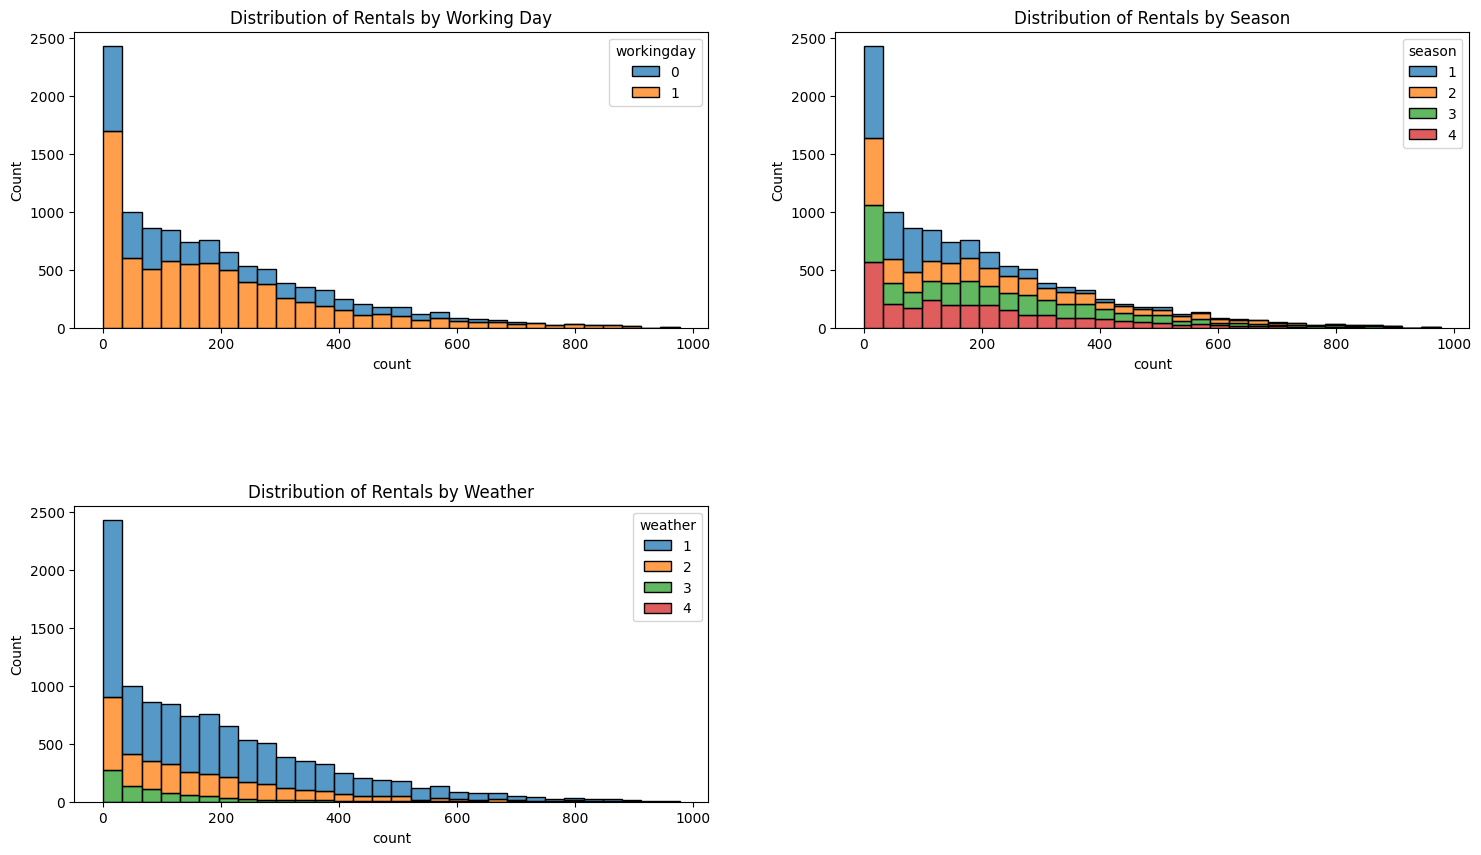

In [ ]:
plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
plt.title("Distribution of Rentals by Working Day")
sns.histplot(data=num_categorical_df, x="count", bins=30, hue="workingday", multiple="stack")

plt.subplot(2, 2, 2)
plt.title("Distribution of Rentals by Season")
sns.histplot(data=num_categorical_df, x="count", bins=30, hue="season", multiple="stack")

plt.subplot(2, 2, 3)
plt.title("Distribution of Rentals by Weather")
sns.histplot(data=num_categorical_df, x="count", bins=30, hue="weather", multiple="stack")

plt.subplots_adjust(hspace=0.6)
plt.show()

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

**Observation for Distribution of Rentals by Working Day:**

Rentals are higher on working days (workingday = 1).

Distribution is positively skewed: more rentals are concentrated between 100–400 counts on working days.

Non-working days (workingday = 0) have fewer high-count instances, indicating less demand.

**Business Insight:**

Peak demand occurs on working days, likely due to office commuters using Yulu for first-mile/last-mile transport.

**Observation for Distribution of Rentals by Season:**

Season 1 (Spring) shows the highest overall count of rentals across bins.

Seasons 2 (Summer) and 3 (Fall) show moderate rental counts.

Season 4 (Winter) has relatively fewer rentals but still contributes across the distribution.

**Business Insight:**

Focus marketing efforts heavily during Spring—it’s the peak opportunity to onboard new users and promote premium plans.

Leverage seasonality-based pricing and fleet movement strategies to balance demand and avoid resource underutilization.

**Observation Distribution of Rentals by Weather:**

Weather = 1 (Clear, partly cloudy) dominates rental counts—predictable and stable demand.

As weather worsens (weather codes 2, 3, 4), rental counts drop drastically.

Weather = 4 (Heavy rain/snow) sees almost negligible rentals.

**Business Insight:**

Bad weather is a significant deterrent for cycle rentals.

Most demand occurs in pleasant or tolerable weather conditions.

# **Q2. Hypothesis Testing**

**1) 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented**

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

**i) 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented**

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

**Hypothesis formulation:**

**Null Hypothesis (H₀):**
The mean number of electric cycles rented is the same on working days and non-working days.

**Alternative Hypothesis (Ha):**
The mean number of electric cycles rented is different on working days and non-working days.

**Check assumptions of the test:**

**Histogram**

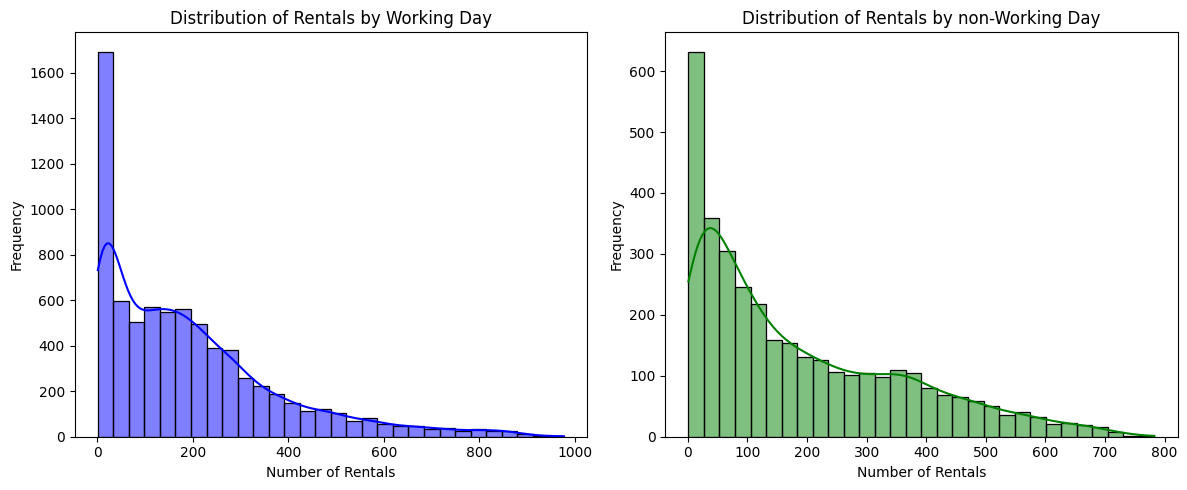

In [ ]:
working = num_categorical_df[num_categorical_df["workingday"] == 1]["count"]
nonworking = num_categorical_df[num_categorical_df["workingday"] == 0]["count"]

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(working, kde=True, bins=30, color='blue')
plt.title('Distribution of Rentals by Working Day')
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(nonworking, kde=True, bins=30, color='green')
plt.title('Distribution of Rentals by non-Working Day')
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Observation:**

Both groups (workingday 0 and 1) show right-skewed distributions.

The peak for non-working days (0) seems slightly higher, but working days (1) also have a broad spread.

Suggests some difference in central tendency, but both are not normally distributed.

**Q-Q plot**

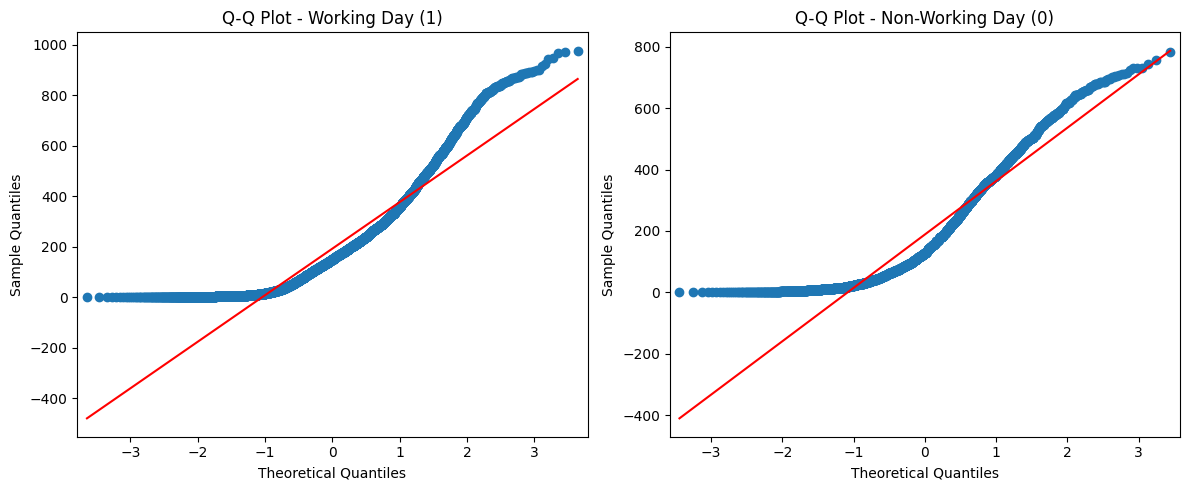

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

working = num_categorical_df[num_categorical_df["workingday"] == 1]["count"]
nonworking = num_categorical_df[num_categorical_df["workingday"] == 0]["count"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sm.qqplot(working, line="s", ax=axes[0])
axes[0].set_title("Q-Q Plot - Working Day (1)")

sm.qqplot(nonworking, line="s", ax=axes[1])
axes[1].set_title("Q-Q Plot - Non-Working Day (0)")

plt.tight_layout()
plt.show()


**Observation:**

Points deviate significantly from the straight line, especially in the tails.

This visually suggests non-normal distribution for both groups.

**levene’s test**

Null Hypothesis (H₀):
All groups have equal variances.

Alternative Hypothesis (H₁):
At least one group has a different variance.

In [ ]:
from scipy.stats import levene

working = num_categorical_df[num_categorical_df["workingday"] == 1]["count"]
nonworking = num_categorical_df[num_categorical_df["workingday"] == 0]["count"]

statistic, p_value = levene(working, nonworking)
print("Statistic:", statistic)
print("P-value:", p_value)

Statistic: 0.004972848886504472
P-value: 0.9437823280916695


In [ ]:
#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, atleast one group has diffrent variance.")
else:
    print("Fail to reject Null hypothesis, all groups have equal variance.")

Fail to reject Null hypothesis, all groups have equal variance.


**Observations:**

As p-value: 0.9437 we are fail to reject null hypothesis.

The variances are equal between working day and non-working day groups.


**Shapiro-wilk test**

Null hypothesis ,H0: the data distribution significantly follow from a normal distribution.

Alternate hypothesis, Ha: the data distribution significantly differs from a normal distribution.

In [ ]:
from scipy.stats import shapiro

working = num_categorical_df[num_categorical_df["workingday"] == 1]["count"]

np.random.sample(42)
count_subset = working.sample(100)

test_stat, p_value = shapiro(count_subset)
print("Statistic:", test_stat)
print("P-value:", p_value)

Statistic: 0.8832755639333963
P-value: 2.5037878463359635e-07


In [ ]:
#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, the data's distribution significantly differs from a normal distribution.")
else:
    print("Fail to reject Null hypothesis, the data's distribution significantly follow from a normal distribution.")

Reject null hypothesis, the data's distribution significantly differs from a normal distribution.


In [ ]:
from scipy.stats import shapiro

nonworking = num_categorical_df[num_categorical_df["workingday"] == 0]["count"]

np.random.sample(42)
count_subset = nonworking.sample(100)

test_stat, p_value = shapiro(count_subset)
print("Statistic:", test_stat)
print("P-value:", p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, the data's distribution significantly differs from a normal distribution.")
else:
    print("Fail to reject Null hypothesis, the data's distribution significantly follow from a normal distribution.")

Statistic: 0.8680829922170137
P-value: 5.8713615067735516e-08
Reject null hypothesis, the data's distribution significantly differs from a normal distribution.


**Observations:**

As p_value for Workingday and non-Workingday respectively which is less than significance level i.e 0.05, reject the null hypothesis.

The rental count data for both groups deviates significantly from a normal distribution.

This supports what we saw in the Q-Q plots.



**Conclusion:**

Our data violates normality assumption (Shapiro-Wilk, Q-Q), however data has equal variance (Levene's test),

Normality assumption failed, but sample size is large, so t-test is robust.

If sample size is less i.e n <= 30 then we have to use a non-parametric test, such as: Mann-Whitney U Test.

In [ ]:
#from scipy.stats import mannwhitneyu
#Statistic, p_value = mannwhitneyu(num_categorical_df["workingday"], num_categorical_df["count"], alternative="two-sided")

from scipy.stats import ttest_ind
working = num_categorical_df[num_categorical_df["workingday"] == 1]["count"]
nonworking = num_categorical_df[num_categorical_df["workingday"] == 0]["count"]

t_stat, p_value = ttest_ind(working, nonworking, alternative = "two-sided")
print("Statistic:", test_stat)
print("P-value:", p_value)


if p_value < 0.05:
    print("Reject null hypothesis,  The mean number of electric cycles rented is different on working days and non-working days.")
else:
    print("Fail to reject Null hypothesis, The mean number of electric cycles rented is the same on working days and non-working days.")

Statistic: 0.8680829922170137
P-value: 0.22644804226361348
Fail to reject Null hypothesis, The mean number of electric cycles rented is the same on working days and non-working days.


**Conclusion:**

Based on the T test (p-value = 0.22), we fail to reject null hypothesis and conclude that the number of electric cycles rented is the same on working days and non-working days.

**ii) ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season**

**a) ANNOVA to check if No. of cycles rented is similar or different in different weather**

weather:
1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**Hypothesis formulation:**

**Null Hypothesis (H₀):**
The mean number of cycles rented is the same across all weather types.

**Alternate Hypothesis (H₁):**
At least one weather category has a different mean number of cycles rented.

**Check assumptions of the test**

**Histogram**

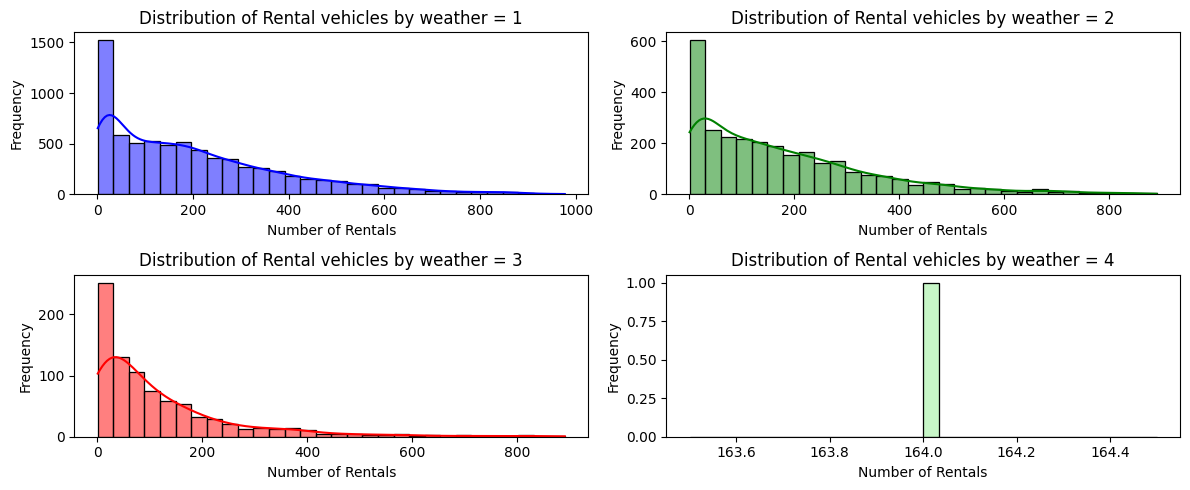

In [ ]:
weather_1 = num_categorical_df[num_categorical_df["weather"] == 1]["count"]
weather_2 = num_categorical_df[num_categorical_df["weather"] == 2]["count"]
weather_3 = num_categorical_df[num_categorical_df["weather"] == 3]["count"]
weather_4 = num_categorical_df[num_categorical_df["weather"] == 4]["count"]

plt.figure(figsize=(12,5))

plt.subplot(2, 2, 1)
sns.histplot(weather_1, kde=True, bins=30, color='blue')
plt.title('Distribution of Rental vehicles by weather = 1')
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.histplot(weather_2, kde=True, bins=30, color='green')
plt.title('Distribution of Rental vehicles by weather = 2')
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
sns.histplot(weather_3, kde=True, bins=30, color='red')
plt.title('Distribution of Rental vehicles by weather = 3')
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.histplot(weather_4, kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Rental vehicles by weather = 4')
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Observations:**

* Weather = 1 (Clear or partly cloudy) shows a wide spread and high frequency of rentals — people rent the most in good weather.

* Weather = 2 (Mist + clouds) shows less demand than clear weather.

* Weather = 3/4 (Rain/Snow/Storm) shows very few rentals — demand drops sharply.

**Business Insights:**

People avoid cycling in bad weather and rent more on clear days.

* On clear days increase the number of available cycles and promote usage.

* On rainy/snowy days reduce active fleet to save costs and maybe offer ride insurance or rain gear for regular users.

**Q-Q plot**

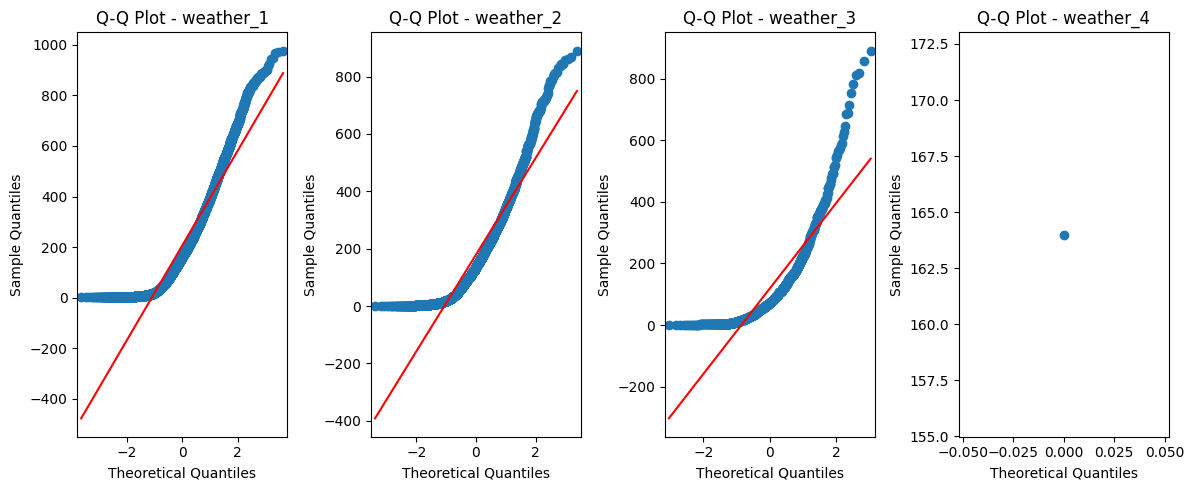

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

weather_1 = num_categorical_df[num_categorical_df["weather"] == 1]["count"]
weather_2 = num_categorical_df[num_categorical_df["weather"] == 2]["count"]
weather_3 = num_categorical_df[num_categorical_df["weather"] == 3]["count"]
weather_4 = num_categorical_df[num_categorical_df["weather"] == 4]["count"]

fig, axes = plt.subplots(1, 4, figsize=(12, 5))

sm.qqplot(weather_1, line="s", ax=axes[0])
axes[0].set_title("Q-Q Plot - weather_1")

sm.qqplot(weather_2, line="s", ax=axes[1])
axes[1].set_title("Q-Q Plot - weather_2")

sm.qqplot(weather_3, line="s", ax=axes[2])
axes[2].set_title("Q-Q Plot - weather_3")

sm.qqplot(weather_4, line="s", ax=axes[3])
axes[3].set_title("Q-Q Plot - weather_4")

plt.tight_layout()
plt.show()

**Observations:**

* Q-Q plots for weather categories show curved patterns, not straight lines,  this means the data is not normally distributed.

* Extreme weather conditions (like rain/snow) show more deviation from the normal line.


**Business Insights:**

* People’s behavior changes sharply with weather, causing unpredictable rental patterns.

* Don't rely only on average behavior. Planning should consider skewed demand, especially in bad weather.

* Forecasting tools should use real-world data patterns, not just traditional models that assume normality.

**levene’s test**

**Null Hypothesis (H₀):** All groups have equal variances.

**Alternative Hypothesis (H₁):** At least one group has a different variance.

In [ ]:
from scipy.stats import levene

weather_1 = num_categorical_df[num_categorical_df["weather"] == 1]["count"]
weather_2 = num_categorical_df[num_categorical_df["weather"] == 2]["count"]
weather_3 = num_categorical_df[num_categorical_df["weather"] == 3]["count"]
weather_4 = num_categorical_df[num_categorical_df["weather"] == 4]["count"]

statistic, p_value = levene(weather_1, weather_2, weather_3, weather_4)
print("Statistic:", statistic)
print("P-value:", p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, atleast one group has diffrent variance.")
else:
    print("Fail to reject Null hypothesis, all groups have equal variance.")

Statistic: 54.85106195954556
P-value: 3.504937946833238e-35
Reject null hypothesis, atleast one group has diffrent variance.


**Observations:**

* The p-value is < 0.05, so the spread (variance) of rental data is not the same across weather types.
* Variances across weather groups are not equal.

**Business Insights:**

* In clear weather rentals are more stable and in bad weather they become unpredictable.

* On good days: Plan fleet and staff as per regular expected demand.

* On bad days: Expect surprises — fewer but possibly erratic rentals. Use dynamic allocation and staffing.

**Shapiro-wilk test**

**Null hypothesis ,H0:** the data distribution significantly follow from a normal distribution.

**Alternate hypothesis, Ha:** the data distribution significantly differs from a normal distribution.

In [ ]:
from scipy.stats import shapiro

weather_1 = num_categorical_df[num_categorical_df["weather"] == 1]["count"]

np.random.sample(42)
count_subset = weather_1.sample(100)

test_stat, p_value = shapiro(count_subset)
print("Statistic:", test_stat)
print("P-value:", p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, the data's distribution significantly differs from a normal distribution.")
else:
    print("Fail to reject Null hypothesis, the data's distribution significantly follow from a normal distribution.")

Statistic: 0.894995240869595
P-value: 8.285379386416853e-07
Reject null hypothesis, the data's distribution significantly differs from a normal distribution.


In [ ]:
from scipy.stats import shapiro

weather_2 = num_categorical_df[num_categorical_df["weather"] == 2]["count"]

np.random.sample(42)
count_subset = weather_2.sample(100)

test_stat, p_value = shapiro(count_subset)
print("Statistic:", test_stat)
print("P-value:", p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, the data's distribution significantly differs from a normal distribution.")
else:
    print("Fail to reject Null hypothesis, the data's distribution significantly follow from a normal distribution.")

Statistic: 0.8447801250288837
P-value: 7.643192313314854e-09
Reject null hypothesis, the data's distribution significantly differs from a normal distribution.


In [ ]:
from scipy.stats import shapiro

weather_3 = num_categorical_df[num_categorical_df["weather"] == 3]["count"]

np.random.sample(42)
count_subset = weather_3.sample(100)

test_stat, p_value = shapiro(count_subset)
print("Statistic:", test_stat)
print("P-value:", p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, the data's distribution significantly differs from a normal distribution.")
else:
    print("Fail to reject Null hypothesis, the data's distribution significantly follow from a normal distribution.")

Statistic: 0.8423870995038012
P-value: 6.2685278587887955e-09
Reject null hypothesis, the data's distribution significantly differs from a normal distribution.


In [ ]:
from scipy.stats import shapiro

weather_4 = num_categorical_df[num_categorical_df["weather"] == 4]["count"]
weather_4_count = len(num_categorical_df[num_categorical_df["weather"] == 4]["count"])
print(f"Weather = 4 has only {weather_4_count} data points. Shapiro-Wilk test is not meaningful.")

Weather = 4 has only 1 data points. Shapiro-Wilk test is not meaningful.


**Observations:**

* All weather groups fail the test (p < 0.05), confirming that rental data is not normally distributed.

* Also Skewness and low sample counts in certain weather categories violate the normality assumption.

**Business Insight:**

* You can’t use simple average-based methods for planning.

* Use robust statistical tools like machine learning models or non-parametric methods.

* Understand that real-world demand is messy — especially due to weather.



Null Hypothesis (H₀): The mean number of cycles rented is the same across all weather types.

Alternate Hypothesis (H₁): At least one weather category has a different mean number of cycles rented.

**Annova Test**

In [ ]:
from scipy.stats import f_oneway

weather_1 = num_categorical_df[num_categorical_df["weather"] == 1]["count"]
weather_2 = num_categorical_df[num_categorical_df["weather"] == 2]["count"]
weather_3 = num_categorical_df[num_categorical_df["weather"] == 3]["count"]
weather_4 = num_categorical_df[num_categorical_df["weather"] == 4]["count"]

f_stats, p_value = f_oneway(weather_1, weather_2, weather_3, weather_4)

print("test statistic:",f_stats)
print("p_value:",p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, At least one weather category has a different mean number of cycles rented.")
else:
    print("Fail to reject Null hypothesis, The mean number of cycles rented is the same across all weather types.")

test statistic: 65.53024112793271
p_value: 5.482069475935669e-42
Reject null hypothesis, At least one weather category has a different mean number of cycles rented.


**Note:**

* Since my all assumptions test for annova are failed (p < 0.05) for all weather, by strictly following to statistical rules we have to use Kruskal-Wallis Test.
* As per our business case statement **"Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test)"** , I have done analysis using both **Annova** and **Kruskal** test

**Kruskal-Wallis H-test**

In [ ]:
from scipy.stats import kruskal

weather_1 = num_categorical_df[num_categorical_df["weather"] == 1]["count"]
weather_2 = num_categorical_df[num_categorical_df["weather"] == 2]["count"]
weather_3 = num_categorical_df[num_categorical_df["weather"] == 3]["count"]
weather_4 = num_categorical_df[num_categorical_df["weather"] == 4]["count"]

f_stats, p_value = kruskal(weather_1, weather_2, weather_3, weather_4)

print("Kruskal-Wallis H-test statistic:",f_stats)
print("p_value:",p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, At least one weather category has a different mean number of cycles rented.")
else:
    print("Fail to reject Null hypothesis, The mean number of cycles rented is the same across all weather types.")

Kruskal-Wallis H-test statistic: 205.00216514479087
p_value: 3.501611300708679e-44
Reject null hypothesis, At least one weather category has a different mean number of cycles rented.


**Observation:**

* Both **Annova** and **Kruskal** test give same result i.e **p-value < 0.05, Conclusion is to Reject Null Hypothesis**

* There is a statistically significant difference in mean rentals across weather types or we can say at least one weather category has a different mean number of cycles rented.

* Weather clearly influences demand.

**Business Insight:**

* Rentals drop in poor weather — likely due to comfort and safety concerns.

* Inventory Control: Reduce active fleet during heavy rain or snow.

* Dynamic Pricing: Offer rainy day discounts or insurance to encourage usage.

* Marketing: Promote usage during good weather with real-time offers.



**b) ANNOVA to check if No. of cycles rented is similar or different in different season**

season - 1: spring, 2: summer, 3: fall, 4: winter

**Hypothesis formulation:**

**Null Hypothesis (H₀):**
There is no statistically significant difference in mean rentals across season.

**Alternate Hypothesis (H₁):**
There is a statistically significant difference in mean rentals across season.

**Check assumptions of the test**

**Histogram**

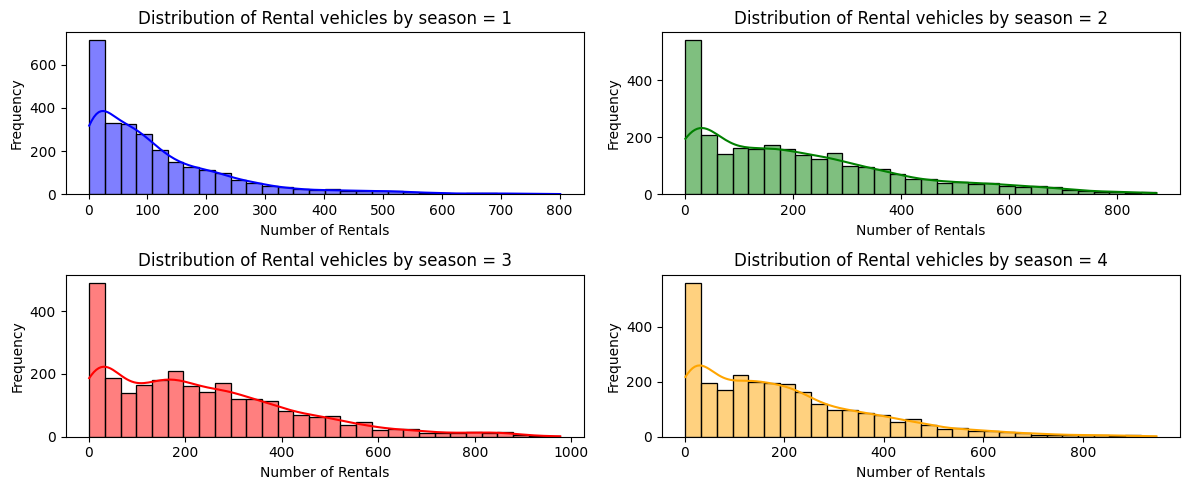

In [ ]:
season_1 = num_categorical_df[num_categorical_df["season"] == 1]["count"]
season_2 = num_categorical_df[num_categorical_df["season"] == 2]["count"]
season_3 = num_categorical_df[num_categorical_df["season"] == 3]["count"]
season_4 = num_categorical_df[num_categorical_df["season"] == 4]["count"]

plt.figure(figsize=(12,5))

plt.subplot(2, 2, 1)
sns.histplot(season_1, kde=True, bins=30, color='blue')
plt.title('Distribution of Rental vehicles by season = 1')
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.histplot(season_2, kde=True, bins=30, color='green')
plt.title('Distribution of Rental vehicles by season = 2')
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
sns.histplot(season_3, kde=True, bins=30, color='red')
plt.title('Distribution of Rental vehicles by season = 3')
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.histplot(season_4, kde=True, bins=30, color='orange')
plt.title('Distribution of Rental vehicles by season = 4')
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Observation:**

* For season =1, most rental counts are concentrated between 0 and 200, Sharp peak at low values and very few high rental days. Distribution is right-skewed, indicating most days have low to moderate demand.

* For season = 2, rentals are more widely spread from 0 to 800+, still right-skewed, but with more high rental days than Spring. shows higher overall demand and more variability.

* For season = 3, distribution is similar to Summer, but even more spread out. several days show very high rentals — up to 900+. High variability, indicating mixed behavior.

* For season = 4, distribution is mostly concentrated below 300 rentals, fewer high rental days, more compressed and predictable pattern.
Demand drops again, similar to Spring.


**Business Insights:**

* Spring has steady but lower demand, maintain a moderate fleet size.

* Avoid overstocking or aggressive promotions, focus on basic availability and service quality.

* Summer is a high-demand season, increase bike availability to meet demand.

* Use surge pricing during peak times also run seasonal campaigns or bundle offers to boost usage further.

* Fall can be as strong or even stronger than Summer in some cases. Prepare for surges in demand keep extra fleet on standby. Leverage festivals or back-to-school periods for marketing.
* Winter is a low-demand season likely due to cold weather, reduce operational costs by limiting active bikes. Focus on loyalty offers or subscriptions for regular riders.


**Q-Q plot**

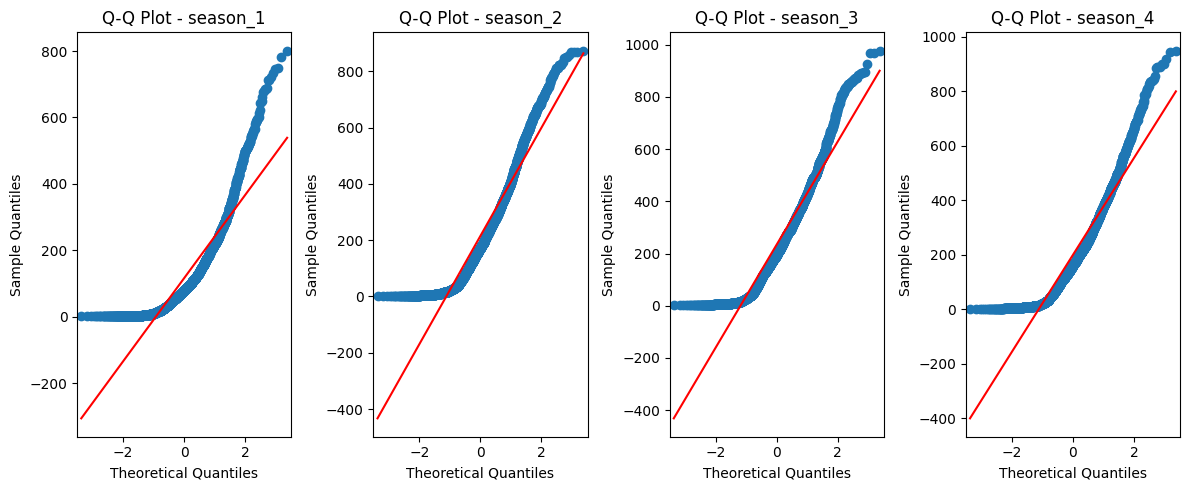

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

season_1 = num_categorical_df[num_categorical_df["season"] == 1]["count"]
season_2 = num_categorical_df[num_categorical_df["season"] == 2]["count"]
season_3 = num_categorical_df[num_categorical_df["season"] == 3]["count"]
season_4 = num_categorical_df[num_categorical_df["season"] == 4]["count"]

fig, axes = plt.subplots(1, 4, figsize=(12, 5))

sm.qqplot(season_1, line="s", ax=axes[0])
axes[0].set_title("Q-Q Plot - season_1")

sm.qqplot(season_2, line="s", ax=axes[1])
axes[1].set_title("Q-Q Plot - season_2")

sm.qqplot(season_3, line="s", ax=axes[2])
axes[2].set_title("Q-Q Plot - season_3")

sm.qqplot(season_4, line="s", ax=axes[3])
axes[3].set_title("Q-Q Plot - season_4")

plt.tight_layout()
plt.show()

**Observation:**

* The blue dots deviate heavily from the red line at both ends, shows right skew.


**Business Implication:**

* Demand is not consistent, and some days show sudden spikes in counts.

* Consider analyzing specific days/events causing peaks and plan for stocking or promotions accordingly.
* Track high-demand days and plan accordingly, avoid assuming average demand is always safe.

* Use dynamic inventory and staffing models for better customer satisfaction and cost control.

**levene’s test**

**Null Hypothesis (H₀):** All groups have equal variances.

**Alternative Hypothesis (H₁):** At least one group has a different variance.

In [ ]:
from scipy.stats import levene

season_1 = num_categorical_df[num_categorical_df["season"] == 1]["count"]
season_2 = num_categorical_df[num_categorical_df["season"] == 2]["count"]
season_3 = num_categorical_df[num_categorical_df["season"] == 3]["count"]
season_4 = num_categorical_df[num_categorical_df["season"] == 4]["count"]

statistic, p_value = levene(season_1, season_2, season_3, season_4)
print("Statistic:", statistic)
print("P-value:", p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, atleast one group has diffrent variance.")
else:
    print("Fail to reject Null hypothesis, all groups have equal variance.")

Statistic: 187.7706624026276
P-value: 1.0147116860043298e-118
Reject null hypothesis, atleast one group has diffrent variance.


**Observation:**

* The p-value is extremely small (**1.01e-118**), which is much less than the significance level of **0.05**.

* This means we reject the null hypothesis.

* The variances of rental counts across different seasons are significantly different.

**Business Implication:**

* Since the variability in rental demand differs by season, Yulu should not treat all seasons equally in terms of resource planning (like fleet availability, maintenance, staffing).

* Some seasons (like Spring or Fall) might have more unpredictable demand, while others might be more stable.

* This suggests a need for season-specific strategies — e.g.:

  * Increase vehicle availability and marketing in high-variance seasons.

  * Improve reliability forecasting models for seasons with high fluctuation.

**Shapiro-wilk test**

**Null hypothesis (H0):** the data distribution significantly follow from a normal distribution.

**Alternate hypothesis (Ha):** the data distribution significantly differs from a normal distribution.

In [ ]:
from scipy.stats import shapiro

season_1 = num_categorical_df[num_categorical_df["season"] == 1]["count"]

np.random.sample(42)
count_subset = season_1.sample(100)

test_stat, p_value = shapiro(count_subset)
print("Statistic:", test_stat)
print("P-value:", p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, the data's distribution significantly differs from a normal distribution.")
else:
    print("Fail to reject Null hypothesis, the data's distribution significantly follow from a normal distribution.")

Statistic: 0.8769273135622322
P-value: 1.3482929541740487e-07
Reject null hypothesis, the data's distribution significantly differs from a normal distribution.


In [ ]:
from scipy.stats import shapiro

season_2 = num_categorical_df[num_categorical_df["season"] == 2]["count"]

np.random.sample(42)
count_subset = season_2.sample(100)

test_stat, p_value = shapiro(count_subset)
print("Statistic:", test_stat)
print("P-value:", p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, the data's distribution significantly differs from a normal distribution.")
else:
    print("Fail to reject Null hypothesis, the data's distribution significantly follow from a normal distribution.")

Statistic: 0.8853544011182803
P-value: 3.079596259892856e-07
Reject null hypothesis, the data's distribution significantly differs from a normal distribution.


In [ ]:
from scipy.stats import shapiro

season_3 = num_categorical_df[num_categorical_df["season"] == 3]["count"]

np.random.sample(42)
count_subset = season_3.sample(100)

test_stat, p_value = shapiro(count_subset)
print("Statistic:", test_stat)
print("P-value:", p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, the data's distribution significantly differs from a normal distribution.")
else:
    print("Fail to reject Null hypothesis, the data's distribution significantly follow from a normal distribution.")

Statistic: 0.9013006783218165
P-value: 1.6284369876067547e-06
Reject null hypothesis, the data's distribution significantly differs from a normal distribution.


In [ ]:
from scipy.stats import shapiro

season_4 = num_categorical_df[num_categorical_df["season"] == 4]["count"]

np.random.sample(42)
count_subset = season_4.sample(100)

test_stat, p_value = shapiro(count_subset)
print("Statistic:", test_stat)
print("P-value:", p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, the data's distribution significantly differs from a normal distribution.")
else:
    print("Fail to reject Null hypothesis, the data's distribution significantly follow from a normal distribution.")

Statistic: 0.885355718135385
P-value: 3.080002277167111e-07
Reject null hypothesis, the data's distribution significantly differs from a normal distribution.


**Observations:**

* The Shapiro-Wilk test was applied to check if the rental count data is normally distributed in each of the 4 seasons.

* The p-values for all seasons are less than 0.05.

* This means the data in each season does NOT follow a normal distribution.

* So, we reject the null hypothesis of normality for each season.


**Business Implications:**

* Since the data is not normally distributed, we cannot use the standard ANOVA test.

* Instead, we should use a non-parametric test like the Kruskal-Wallis test, which does not assume normal distribution.

* The case study explicitly says to continue doing the analysis even if assumptions fail, so performing ANNOVA test.

**Annova Test**

**Null Hypothesis (H₀):**
There is no statistically significant difference in mean rentals across season.

**Alternate Hypothesis (H₁):**
There is a statistically significant difference in mean rentals across season.

In [ ]:
from scipy.stats import f_oneway

season_1 = num_categorical_df[num_categorical_df["season"] == 1]["count"]
season_2 = num_categorical_df[num_categorical_df["season"] == 2]["count"]
season_3 = num_categorical_df[num_categorical_df["season"] == 3]["count"]
season_4 = num_categorical_df[num_categorical_df["season"] == 4]["count"]

f_stats, p_value = f_oneway(season_1, season_2, season_3, season_4)

print("test statistic:",f_stats)
print("p_value:",p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, There is a statistically significant difference in mean rentals across season.")
else:
    print("Fail to reject Null hypothesis, There is no statistically significant difference in mean rentals across season.")

test statistic: 236.94671081032106
p_value: 6.164843386499654e-149
Reject null hypothesis, There is a statistically significant difference in mean rentals across season.


**Note:**

* Since my all assumptions test for annova are failed (p < 0.05) for all weather, by strictly following to statistical rules we have to use Kruskal-Wallis Test.

* As per our business case statement **"Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test)"** , I have done analysis using both **Annova** and **Kruskal** test.

**Kruskal-Wallis H-test**

In [ ]:
from scipy.stats import kruskal

season_1 = num_categorical_df[num_categorical_df["season"] == 1]["count"]
season_2 = num_categorical_df[num_categorical_df["season"] == 2]["count"]
season_3 = num_categorical_df[num_categorical_df["season"] == 3]["count"]
season_4 = num_categorical_df[num_categorical_df["season"] == 4]["count"]

f_stats, p_value = kruskal(season_1, season_2, season_3, season_4)

print("Kruskal-Wallis H-test statistic:",f_stats)
print("p_value:",p_value)

#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis, There is a statistically significant difference in mean rentals across season.")
else:
    print("Fail to reject Null hypothesis, There is no statistically significant difference in mean rentals across season.")

Kruskal-Wallis H-test statistic: 699.6668548181988
p_value: 2.479008372608633e-151
Reject null hypothesis, There is a statistically significant difference in mean rentals across season.


**Observations:**

* * Both **Annova** and **Kruskal** test give same result i.e **p-value < 0.05, Conclusion is to Reject Null Hypothesis**

* Test Statistic (F-value) = 236.95,
This is a very high F-value, indicating large differences between group means relative to within-group variance.

* p-value = 6.16e-149 (very close to 0),
This p-value is far less than the significance level of 0.05, meaning the result is statistically significant.

**Conclusion:**

Since the p-value < 0.05, we reject the null hypothesis.

There is a statistically significant difference in mean rentals across different seasons.

**Business Implications:**

**Strategic planning should be seasonal:**

* Increase fleet availability, marketing, and operational staff in high-demand seasons (identified using post-hoc tests or visualizations).

* Optimize costs during low-demand seasons by reducing fleet, storage, or promotions.

**Marketing & Pricing Strategy:**

* Tailor discounts or pricing strategies based on expected seasonal demand. For example, offer promotions in low-demand seasons to improve utilization.

**Product Improvements:**

* Seasonality might correlate with weather or festival patterns, so product design (like rain protection, battery capacity) can be optimized accordingly.

**iii) Chi-square test to check if Weather is dependent on the season**

season: season (1: spring, 2: summer, 3: fall, 4: winter)

weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**Hypothesis Formulation:**

**Null Hypothesis:** Weather is not dependent on the season.

**Alternate Hypothesis:** Weather is dependent on the season.

In [ ]:
contingency_table = pd.crosstab(num_categorical_df['season'], num_categorical_df['weather'])
contingency_table


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square value:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected frequencies:\n", pd.DataFrame(expected,
                                                index=contingency_table.index,
                                                columns=contingency_table.columns))


#Consider Significance level = 0.05
if p_value < 0.05:
    print("Reject null hypothesis: Weather depends on Season.")
else:
    print("Fail to reject null hypothesis: Weather and Season are independent.")



Chi-Square value: 49.158655596893624
p-value: 1.549925073686492e-07
Degrees of Freedom: 9
Expected frequencies:
 weather            1           2           3         4
season                                                
1        1774.546390  699.258130  211.948742  0.246739
2        1805.597648  711.493845  215.657450  0.251056
3        1805.597648  711.493845  215.657450  0.251056
4        1806.258313  711.754180  215.736359  0.251148
Reject null hypothesis: Weather depends on Season.


**Observations:**

* Chi-Square Value: 49.16, indicates a large difference between the observed and expected weather frequencies across seasons.

* p-value: 1.55e-07, this is far less than 0.05, so the result is statistically significant.

* Degrees of Freedom: 9

* Expected Frequencies:

  * Very small values (like 0.25) are seen in the expected frequencies for Weather category 4, indicating that some categories are rare and this may slightly affect the robustness of the test.

**Conclusion:**

* Since p < 0.05, you reject the null hypothesis.

* This means there is a statistically significant association between Weather and Season.

* The weather is dependent on the season, certain types of weather are more or less likely to occur in specific seasons.

**Note:**

* Even though the p-value says there's a significant relationship, if Chi-square Test Assumptions fails then the Chi-square test might give inaccurate results.

* As per Chi-square important assumption :

At least 80% of the expected frequencies should be ≥ 5, and no expected frequency should be < 1.

**Chi-square Assumption test**

In [ ]:
expected_values = expected.flatten()

# Check for values < 5 and < 1
count_less_than_5 = np.sum(expected_values < 5)
count_less_than_1 = np.sum(expected_values < 1)
total = len(expected_values)

print("Expected values < 5:", count_less_than_5)
print("Expected values < 1:", count_less_than_1)
print("Percentage < 5:", (count_less_than_5 / total) * 100)

Expected values < 5: 4
Expected values < 1: 4
Percentage < 5: 25.0


**Chi-square important assumption is:**

At least 80% of the expected frequencies should be ≥ 5, and no expected frequency should be < 1.

  * If this condition is met, the Chi-square approximation is valid.

  * If this condition is not met, the Chi-square test might give inaccurate results.

* The Chi-square test result may not be reliable or accurate.

**Observations:**

This violates the assumptions of the Chi-square test because:

Test requirement is:

  * No expected frequency should be less than 1 and we have 4 values < 1

  * No more than 20% of the expected values should be less than 5 and I got 25%

**This means Chi-square test results are inaccurate.**

* To ensure statistical validity, it is advisable to merge this rare category with a similar one—such as combining it with 'Light Rain' to form a broader and more meaningful weather classification.

**Prior to combining** "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" with "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"

In [ ]:
weather_combined_df = df.copy()
weather_combined_df['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


**After combining**

In [ ]:
weather_combined_df['weather_combined'] = weather_combined_df['weather'].replace({4: 3})
weather_combined_df['weather_combined'].value_counts()

,count
weather_combined,
1,7192
2,2834
3,860


In [ ]:
contingency_combined = pd.crosstab(weather_combined_df['season'], weather_combined_df['weather_combined'])
contingency_combined

weather_combined,1,2,3
season,,,
1,1759,715,212
2,1801,708,224
3,1930,604,199
4,1702,807,225


In [ ]:
from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_combined)

expected_values = expected.flatten()
count_less_than_5 = sum(expected_values < 5)
count_less_than_1 = sum(expected_values < 1)
percent_less_than_5 = (count_less_than_5 / len(expected_values)) * 100

print("New Contingency Table:\n", contingency_combined)
print("\nChi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("\nExpected values < 5:", count_less_than_5)
print("Expected values < 1:", count_less_than_1)
print("Percentage of expected values < 5:", percent_less_than_5)

New Contingency Table:
 weather_combined     1    2    3
season                          
1                 1759  715  212
2                 1801  708  224
3                 1930  604  199
4                 1702  807  225

Chi-square statistic: 46.098057769660684
p-value: 2.8304096630424703e-08
Degrees of freedom: 6

Expected values < 5: 0
Expected values < 1: 0
Percentage of expected values < 5: 0.0


In [ ]:
if p_value < 0.05:
    print("Reject null hypothesis: Weather depends on Season.")
else:
    print("Fail to reject null hypothesis: Weather and Season are independent.")

Reject null hypothesis: Weather depends on Season.


**Observations:**

* Chi-square statistic: 46.10, a large value indicates strong evidence of association between season and weather_combined.

* p-value: 2.83e-08, extremely small or much less than 0.05 this means there is statistically significance between weather and season.

* Reject the null hypothesis, Weather (even after combining) still depends on season.

* Degrees of Freedom: 6

* Expected Value Checks:

  * Expected values < 5: 0

  * Expected values < 1: 0

  * Percentage of expected values < 5: 0.0%

* This means the assumptions of Chi-square test are fully satisfied now.

**Business Implications:**

* Weather still changes with season, even after combining categories, the strong seasonal dependency remains.

* Use this to forecast demand:

  * Plan ahead for bad weather seasons that might reduce ride demand.

  * Prepare for moderate weather seasons with higher user activity.

* Operational Actions:

  * Shift fleets or reduce idle bikes in low-demand weather-season combos.

* Boost support, availability, and marketing during favorable weather periods.

* Marketing Strategy:

  * Offer ride protection, flexible pricing, or bonuses in tougher weather.

  * Launch promotions during weather-friendly seasons to capture higher demand.

# **Overall Observations from Analysis:**

**1. Working Day vs. Number of Rides**

**Observation:** The average number of cycles rented is slightly higher on working days than on holidays or weekends.

**Statistical Test:** 2-sample t-test was used.

**Result:** The p-value is high, so we fail reject the null hypothesis , the mean number of electric cycles rented is the same on working days and non-working days.

**Interpretation:** The number of cycles rented on working days and non-working days is nearly the same, with no significant difference in the mean values.

**2. Season vs. Number of Rides**

**Observation:** Ride count is highest in fall (season 3) and lowest in spring (season 1).

**Statistical Test:** ANOVA was used.

**Result:** p-value < 0.05, so season significantly affects demand.

**Interpretation:** People prefer riding in more pleasant weather. Spring may be too hot/humid or have fewer users due to other reasons.

**3. Weather vs. Number of Rides**

**Observation:** Ride count is highest in clear weather (type 1) and lowest in rainy/snowy conditions (type 3 or 4).

**Statistical Test:** ANOVA was used.

**Result:** p-value is low → Weather significantly affects rentals.

**Interpretation:** People avoid riding in bad weather like rain, mist, or snow.

**4. Season vs. Weather**

**Observation:** Certain weather types occur more in specific seasons (e.g., rain in monsoon).

**Statistical Test:** Chi-square test was used.

**Result:** p-value < 0.05 → Weather and season are dependent.

**Interpretation:** Yulu can plan ahead by looking at seasonal weather patterns.

# **Recommendations to Enhance Revenue and Growth**

**1. Smart Bike Reallocation by Season & Weather**

  * Allocate more bikes during high-demand seasons (fall and summer).

  * Reduce fleet or shift to other locations during low-demand seasons like spring.

  * Track weather forecasts to plan availability — fewer bikes in bad weather, more during good weather.

**2. Time & Day-Based Demand Planning**

  * Increase bike supply during working days, especially during office commute hours (morning and evening).

  * Deploy more bikes near office zones, metro stations, and tech parks on weekdays.

  * Weekends and holidays can focus on recreational routes, parks, or tourist areas.

**3. Use Promotions to Boost Off-Peak Usage**

  * Run special offers, discounts, or reward points during spring and bad weather days to attract more users.

  * Promote group rides or festival-based offers during holidays when demand is low.

**4. User Segmentation & Targeted Marketing**

  * Registered users drive most of the demand. Engage them with loyalty programs.

  * Casual users are more sensitive to weather — offer reminders or flexible pricing to encourage them.

**5. Build a Predictive Model for Forecasting Demand**

  * Use features like temp, humidity, hour, workingday, season, and weather to predict future demand and optimize fleet planning in real time.

# **The goal is to:**

**1) Identify which factors impact the number of rides.**

=>

* Season and Weather have a statistically significant impact on ride demand (p-value < 0.05 from ANOVA tests).

* Working day vs. non-working day does not show a significant difference in the average number of rides (high p-value from 2-sample t-test).

* Weather and Season are interdependent, as revealed by the Chi-square test.


**2) Understand how these factors affect demand.**

=>

* Season: Fall has the highest ride volume, while Spring has the lowest. This suggests that users prefer riding in more favorable weather.

* Weather: Clear weather significantly boosts ride counts, whereas bad weather (rain, snow, mist) leads to fewer rentals.

* Day Type: There is no major difference in ride numbers between working and non-working days, indicating consistent usage patterns.


**3) Use these insights to plan better services, pricing, and marketing.**

=>

* Smart Fleet Allocation: Shift bikes to high-demand areas in peak seasons and reduce supply during low-demand periods or poor weather.

* Targeted Promotions: Offer discounts during low-demand times (e.g., spring, rainy days) to boost usage.

* Time & Location Strategy: Focus on office hubs during weekdays and recreational zones on weekends.

* User-Centric Campaigns: Use segmentation to reward loyal (registered) users and incentivize casual users based on weather or day type.

* Demand Forecasting: Develop a predictive model using features like weather, season, temperature, and day type to optimize inventory and pricing in real-time.